In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
import numpy as np
from hmmlearn import hmm

In [3]:
import fileinput
import glob

file_list = glob.glob("*.txt")

with open('result.txt', 'w') as file:
    input_lines = fileinput.input(file_list)
    file.writelines(input_lines)

In [4]:
file_list

['result.txt', 'tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

In [29]:
with open('result.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я ]','', text)

In [30]:
Russian = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(Russian)}

In [31]:
probabilities = np.zeros((len(Russian), len(Russian)))

In [32]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]]+= 1

In [33]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [34]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))

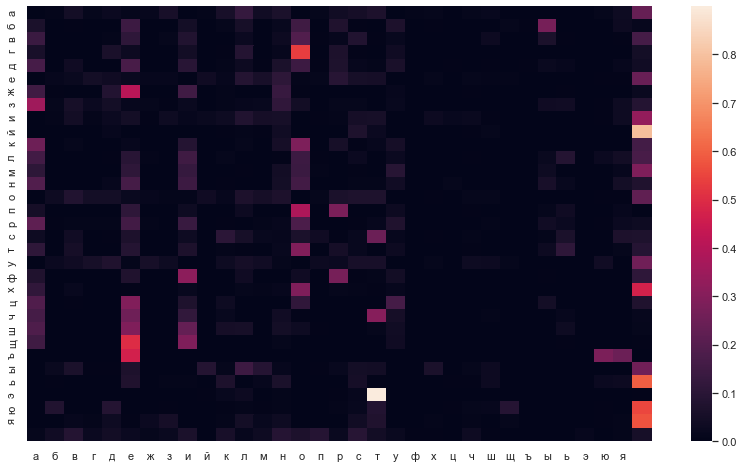

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [50]:
start = POS['п']
end = POS['р']
prior = 1. / len(Russian)
for c in Russian:
    if c != ' ':
        for c1 in Russian:
            proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[c1]]* probabilities[POS[c], POS[c1]] * probabilities[POS[c1], end]
            if proba > 0 and c1 != ' ':
                print(''.join(['п', c, c1, 'р']), proba)

паар 2.5259319655179206e-12
пабр 9.152948867801845e-09
павр 5.622450827637163e-08
пагр 1.5900990354834345e-08
падр 8.268696002929531e-08
паер 2.7475826150860986e-08
пажр 1.2620321357811227e-10
пазр 7.069525973401241e-08
паир 4.87676732683669e-11
пайр 2.596167400646077e-10
пакр 2.968016959160112e-07
палр 4.392890740789638e-10
памр 4.466185920763764e-09
панр 7.877370758644793e-09
паор 1.993596715301023e-11
папр 7.68023443999282e-08
парр 1.2300386533970017e-09
паср 2.6475331348342157e-08
патр 3.919938664194484e-07
паур 1.2949662799278718e-10
пафр 2.496628887007109e-08
пахр 3.4746398962666074e-09
пачр 2.9194756713415686e-10
пашр 9.967426720758597e-11
пащр 1.5809091212274394e-11
паэр 1.488715332765079e-14
паюр 1.8111713547425723e-09
паяр 5.253876946477897e-09
пвар 4.017686005627863e-10
пвбр 7.099740225861739e-15
пввр 8.768039291814255e-15
пвгр 3.343504549487701e-14
пвдр 2.1681636797739784e-12
пвер 5.819937383675839e-10
пвжр 1.1353221415104981e-19
пвзр 1.0950126796629402e-12
пвир 2.800624553

In [21]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бесееродл


In [22]:
from hmmlearn.hmm import GaussianHMM

In [23]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

In [24]:
values = series.values.reshape(-1,1)

In [28]:
for n in range(1, 6):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.45793588019535
3 -465.4758943249863
4 -454.5453273063033
5 -447.6657088378957


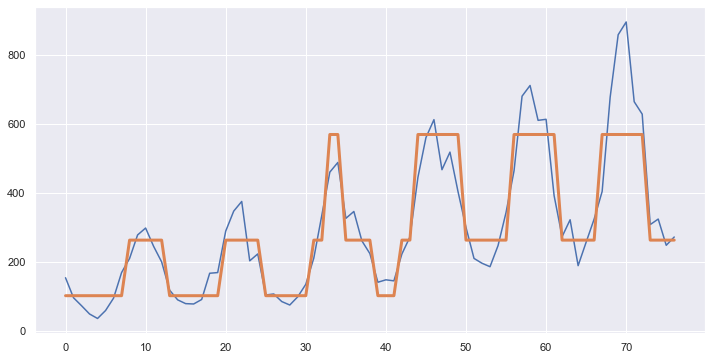

In [26]:
model = GaussianHMM(n_components=3,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)